### <caenter> Подготовительная часть для выполнения практического задания

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])

X = np.array(
    [
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]
    ]
)

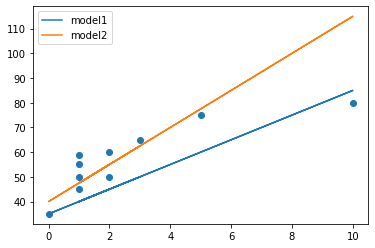

In [3]:
plt.scatter(X[1], y)
plt.plot(X[1], 35 * X[0] + X[1] * 5, label='model1')
plt.plot(X[1], 40 * X[0] + X[1] * 7.5, label='model2')
plt.legend(loc='best')
plt.show()

In [4]:
y_pred1 = np.ones(10) * 35 + X[1] * 5
y_pred2 = np.ones(10) * 40 + X[1] * 7.5

In [5]:
y_pred1

array([40., 40., 45., 40., 50., 35., 60., 85., 40., 45.])

In [6]:
y_pred2

array([ 47.5,  47.5,  55. ,  47.5,  62.5,  40. ,  77.5, 115. ,  47.5,
        55. ])

$\displaystyle MAE = \frac{1}{l} \sum_{i=1}^{l}|y_{i}-\hat{y_i}|$  
$\displaystyle MSE = \frac{1}{l} \sum_{i=1}^{l}(y_{i}-\hat{y_i})^2$

In [7]:
mae_1 = np.mean(np.abs(y_pred1 - y))
mae_2 = np.mean(np.abs(y_pred2 - y))

In [8]:
mae_1, mae_2

(10.4, 7.9)

In [9]:
mse_1 = np.mean((y_pred1 - y) ** 2)
mse_2 = np.mean((y_pred2 - y) ** 2)

In [10]:
mse_1, mse_2

(143.6, 151.35)

$MAE_1>MAE_2$ но $MSE_1<MSE_2$
Выбор метрики:
 * $MSE$ - в случае, если есть выбросы, и они имеют значение при работе модели
 * $MAE$ - в случае, если выбросы не важны, модель должна хорошо работать на большинстве моделей

Аналитический метод нахождения вектора весов в модели линейной регрессии:
$w=(X^{T}\cdot X)^{-1}\cdot X^{T}\cdot Y$

Реализация:

In [11]:
W_0 = np.linalg.inv(X @ X.T) @ X @ y
W_0
# отличается от классического вида, поскольку у нас изначально массив
# Х представляет собой транспонированную матрицу
# для приведения к классическому виду необходимо изначально
# задавать вектор признаков и вектор значений в иной размерности
# код ниже

array([47.23214286,  3.91071429])

In [12]:
X1 = X.swapaxes(0, 1)
y1 = y.reshape((len(y), -1))
W1 = np.linalg.inv(X1.T @ X1) @ X1.T @ y1
W1

array([[47.23214286],
       [ 3.91071429]])

In [13]:
# ковариационная матрица
np.dot(X, X.T)
#np.dot(X1.T,X1)

array([[ 10,  26],
       [ 26, 146]])

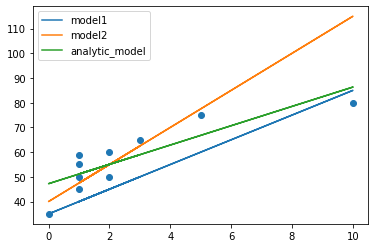

In [14]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='model1')
plt.plot(X[1], 40 * np.ones(10) + X[1] * 7.5, label='model2')
plt.plot(X[1], W_0[0] + W_0[1] * X[1], label='analytic_model')
plt.legend(loc='best')
plt.show()

In [15]:
y_pred3 = W_0[0] + W_0[1] * X[1]

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred) ** 2)
    return err

In [18]:
calc_mae(y, y_pred1), calc_mae(y, y_pred2), calc_mae(y, y_pred3)

(10.4, 7.9, 6.182142857142856)

In [19]:
calc_mse(y, y_pred1), calc_mse(y, y_pred2), calc_mse(y, y_pred3)


(143.6, 151.35, 45.93749999999999)

Аналитическая формула имеет недостатки использования при вычислении весов линейной
модели в следствии того, что вычисление обратной матрицы при большом количестве признаков
имеет высокую вычислительную сложность.

## <center> Практическое задание

**1. Подберите скорость обучения($\alpha$) и количество итераций:**

In [20]:
n = X.shape[1]
alpha = 1e-03

W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.001)

In [21]:
for i in range(20000):
    y_pred = W @ X
    err = calc_mse(y, y_pred)
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1 / n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 300 == 0:
        print(i, W, err)
    if err < 45.9375:
        break

0 [1.1102 0.84  ] 3173.15
300 [14.98921624  9.8634316 ] 606.0048772266812
600 [23.63334499  8.26841272] 345.9620646005472
900 [29.95992301  7.10016181] 206.65877484533297
1200 [34.59041507  6.24510603] 132.03487746741158
1500 [37.97952317  5.61928129] 92.05932434403572
1800 [40.46004868  5.16123328] 70.6446716165486
2100 [42.2755726  4.8259829] 59.172976652790545
2400 [43.60437454  4.58060946] 53.027661712772876
2700 [44.5769393   4.40101793] 49.7356550972455
3000 [45.28877016  4.26957292] 47.97214782992787
3300 [45.80976699  4.17336687] 47.027448063161664
3600 [46.19109031  4.1029526 ] 46.52137833162843
3900 [46.47018504  4.05141563] 46.25027995499746
4200 [46.67445754  4.01369514] 46.105054257366206
4500 [46.82396684  3.98608711] 46.02725776328683
4800 [46.93339434  3.96588049] 45.985582670037175
5100 [47.01348553  3.95109103] 45.96325758433858
5400 [47.07210515  3.94026647] 45.95129817615049
5700 [47.1150095   3.93234386] 45.94489159629944
6000 [47.14641166  3.92654521] 45.941459631

*При alpha = 0.001 оптимальное количество итераций ~18300*

**2\*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:**

In [22]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y))))
    if i % 100 == 0:
        print(i, W, err)


0 [47.23214267  3.91071432] 45.93750000000002
100 [47.23214267  3.91071432] 45.937500000000014
200 [47.23214267  3.91071432] 45.93750000000002
300 [47.23214267  3.91071432] 45.93749999999999
400 [47.23214267  3.91071432] 45.937500000000014
500 [47.23214267  3.91071432] 45.937500000000014
600 [47.23214267  3.91071432] 45.937500000000014
700 [47.23214267  3.91071432] 45.937500000000014
800 [47.23214267  3.91071432] 45.937500000000014
900 [47.23214267  3.91071432] 45.937500000000014


##### Решение:

In [23]:
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=ii))
    if i % 100 == 0:
        print(i, W, err)


0 [47.23214267  3.91071432] 45.937500000000014
100 [47.23214269  3.91071432] 45.937500000000014
200 [47.23214271  3.91071431] 45.9375
300 [47.23214272  3.91071431] 45.937500000000014
400 [47.23214274  3.91071431] 45.937500000000014
500 [47.23214275  3.91071431] 45.9375
600 [47.23214276  3.9107143 ] 45.93750000000002
700 [47.23214277  3.9107143 ] 45.9375
800 [47.23214278  3.9107143 ] 45.937499999999986
900 [47.23214279  3.9107143 ] 45.937500000000014
